# RESULTS ANALYSIS - NARPS DATASET BY TEAM 0I4U

This notebook analyse the results obtained when reproducing the pipeline used by team **0I4U** for the NARPS Study. 

To use this notebook, replace the "exp_dir" by the directory where you stored the results of the previous notebook (**final_results** directory) and the "data_dir" by the directory where you stored the results of the original team **NARPS-0I4U** directory.   

Botvinik-Nezer, R., Holzmeister, F., Camerer, C.F., Dreber, A., Huber, J., Johannesson, M., Kirchler, M., Iwanir, R., Mumford, J.A., ..., Nichols, T.E., Poldrack, R.A., Schonberg, T. (2020). Variability in the analysis of a single neuroimaging dataset by many teams. Nature. https://doi.org/10.1038/s41586-020-2314-9.

In [1]:
from lib import bland_altman, download_original_maps, download_reproduced_maps
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from os.path import join as opj
from lib import activated_voxels
from nilearn import plotting, datasets

/local/egermani/miniconda3/envs/workEnv/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
data_dir = '/local/egermani/analytic_variability_fmri/data/derived/original'

exp_dir = '/local/egermani/analytic_variability_fmri/data/derived/reproduced'

fig_dir = '/local/egermani/analytic_variability_fmri/figures'

quality_measures_dir = '/local/egermani/analytic_variability_fmri/figures/quality_measures'

result_dir = '/local/egermani/analytic_variability_fmri/figures/quality_measures/0I4U'

team_ID = '0I4U'

collection_original = "4938"
collection_repro = ""

In [3]:
import os 
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
if not os.path.isdir(quality_measures_dir):
    os.mkdir(quality_measures_dir)
if not os.path.isdir(result_dir):
    os.mkdir(result_dir)

In [4]:
#download_original_maps.get_original_maps(collection_original, team_ID, data_dir)

In [5]:
# get_reproduced_maps(collection, team_ID, exp_dir)

In [6]:
original_unthresh = [opj(data_dir, f"NARPS-{team_ID}", 'hypo1_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo2_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo3_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo4_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo5_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo6_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo7_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo8_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo9_unthresh.nii.gz')]

original_thresh = [opj(data_dir, f"NARPS-{team_ID}", 'hypo1_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo2_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo3_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo4_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo7_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo6_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo5_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo8_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo9_thresh.nii.gz')]

In [7]:
n_sub = 108
repro_unthresh = [opj(exp_dir, "NARPS-reproduction",
                      f"team_{team_ID}_nsub_{n_sub}_hypo{i}_unthresholded.nii") for i in range(1,10)]

repro_thresh = [opj(exp_dir, "NARPS-reproduction",
                      f"team_{team_ID}_nsub_{n_sub}_hypo{i}_thresholded.nii") for i in range(1,10)]

In [8]:
hypothesis = ['Positive effect of gain in ventromedial PFC - for the equal indifference group',
'Positive effect in of gain ventromedial PFC - for the equal range group', 
'Positive effect in of gain ventral striatum - for the equal indifference group',
'Positive effect in of gain ventral striatum - for the equal range group',
'Negative effect in of loss VMPFC - for the equal indifference group',
'Negative effect in of loss VMPFC - for the equal range group',
'Positive effect in of loss amygdala - for the equal indifference group',
'Positive effect in of loss amygdala - for the equal range group',
'Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition.']

In [9]:
atlas_cort = datasets.fetch_atlas_harvard_oxford('cort-prob-2mm')
atlas_sub = datasets.fetch_atlas_harvard_oxford('sub-prob-2mm')

coords = plotting.find_probabilistic_atlas_cut_coords(atlas_cort.maps)
coords_sub = plotting.find_probabilistic_atlas_cut_coords(atlas_sub.maps)

vmPFC = (int(coords[24][0]), int(coords[24][1]), int(coords[24][2]))
vs = (int(coords_sub[19][0]), int(coords_sub[19][1]), int(coords_sub[19][2]))
amygdala = (int(coords_sub[20][0]), int(coords_sub[20][1]), int(coords_sub[20][2]))

### VISUALIZE DATA

#### Thresholded maps

/local/egermani/miniconda3/envs/workEnv/lib/python3.8/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(
/local/egermani/miniconda3/envs/workEnv/lib/python3.8/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


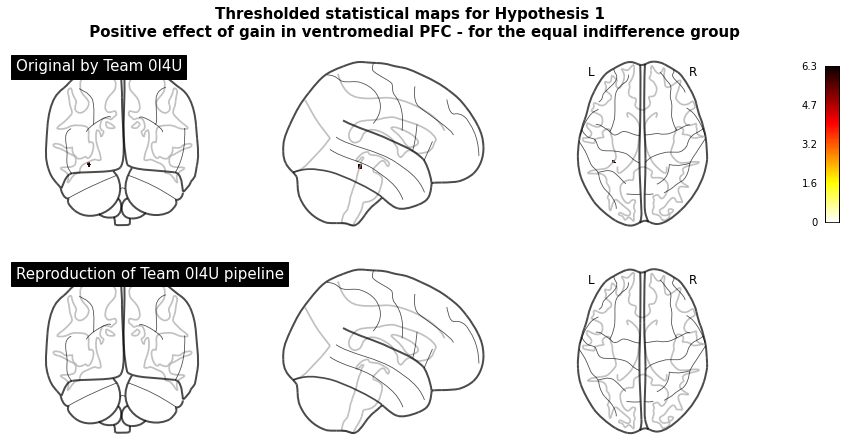

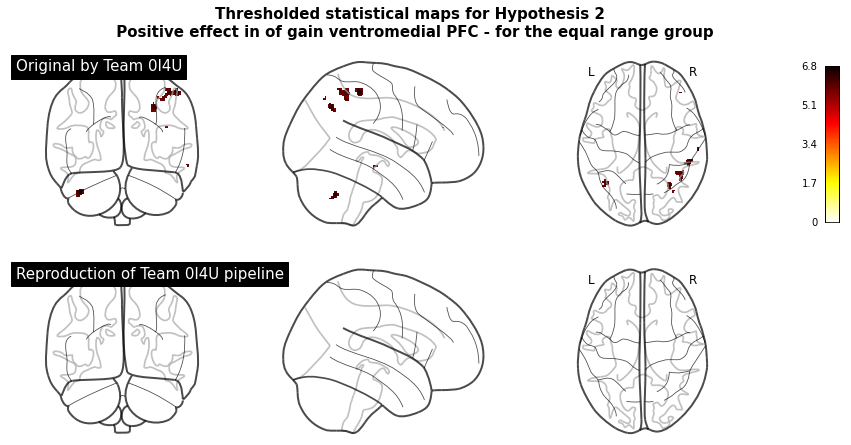

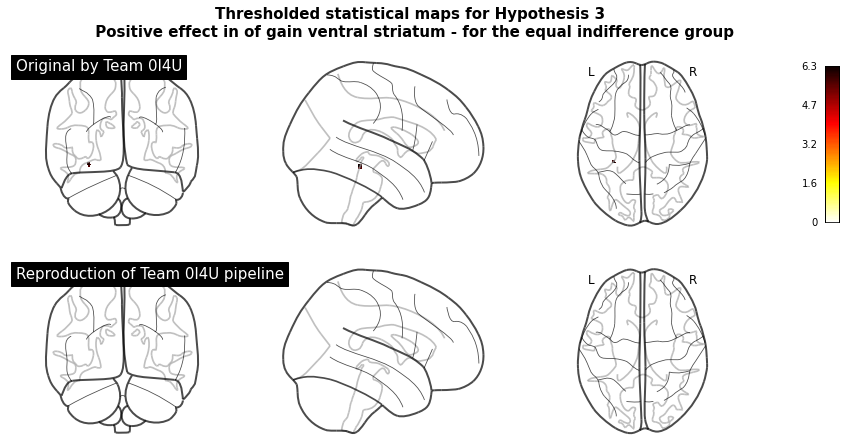

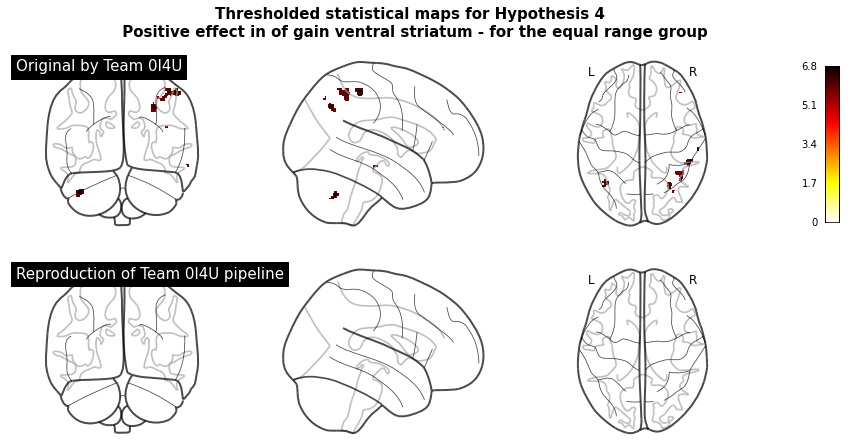

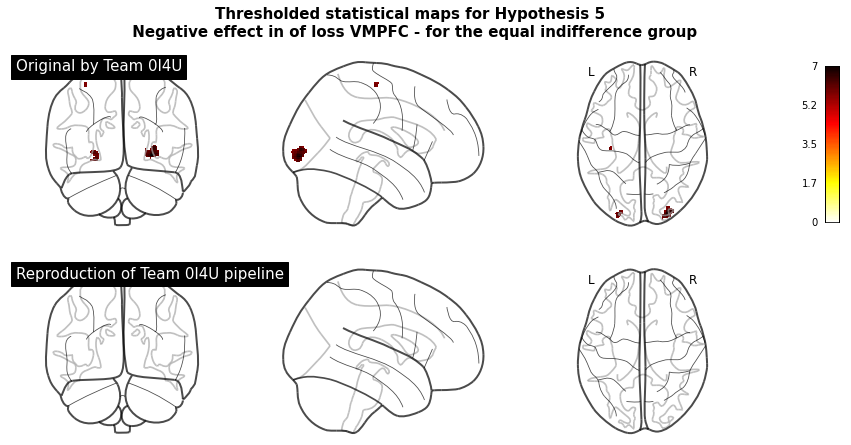

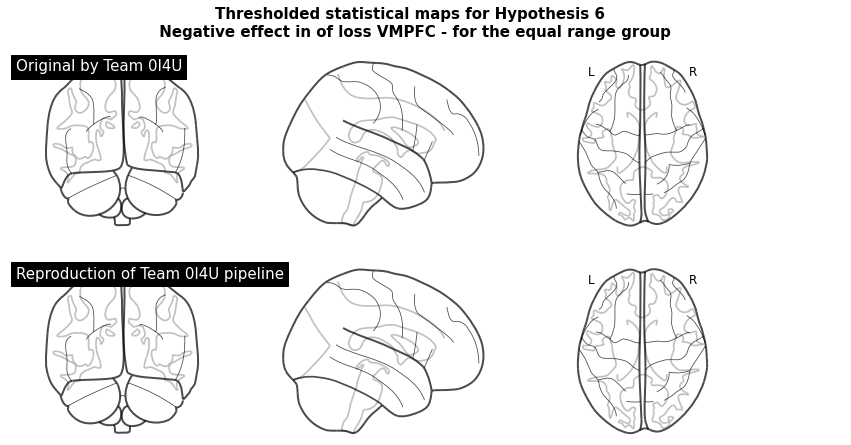

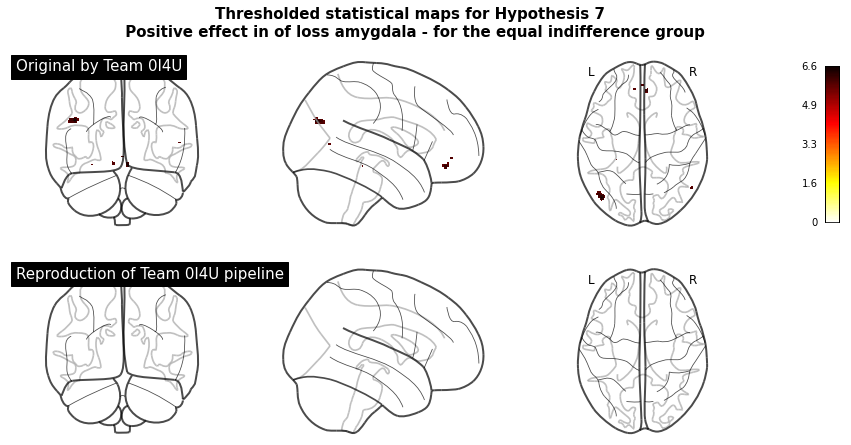

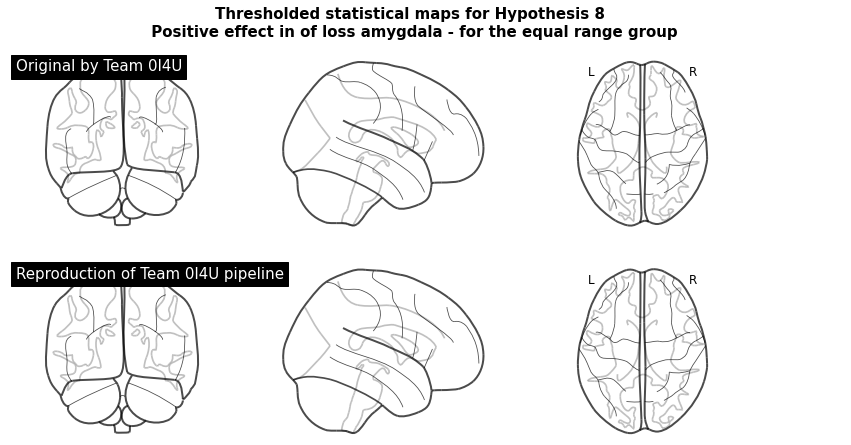

In [10]:
from nilearn import plotting

for i in range(len(original_thresh)):
    f = plt.figure(figsize = (15, 7))
    gs = f.add_gridspec(2, 1)
    ax1 = f.add_subplot(gs[0, 0])
    ax2 = f.add_subplot(gs[1, 0])
    f.suptitle(f"Thresholded statistical maps for Hypothesis {i+1} \n {hypothesis[i]}",
               fontsize=15, fontweight = 'bold')
    plotting.plot_glass_brain(original_thresh[i], title = f"Original by Team {team_ID}", 
                        figure = f, axes = ax1, colorbar = True)
    plotting.plot_glass_brain(repro_thresh[i], title = f"Reproduction of Team {team_ID} pipeline",
                        figure = f, axes = ax2, colorbar = True)
    f.savefig(opj(result_dir, f"thresholded_spm_hypo{i+1}_{team_ID}.png"))

#### Unthresholded maps

/local/egermani/miniconda3/envs/workEnv/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


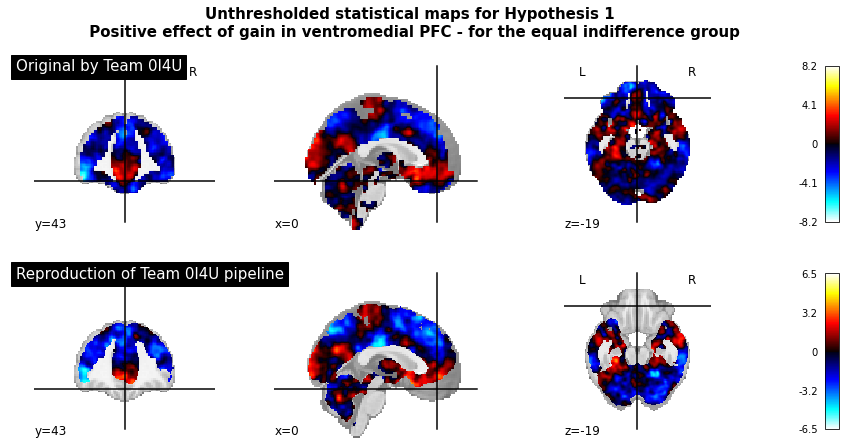

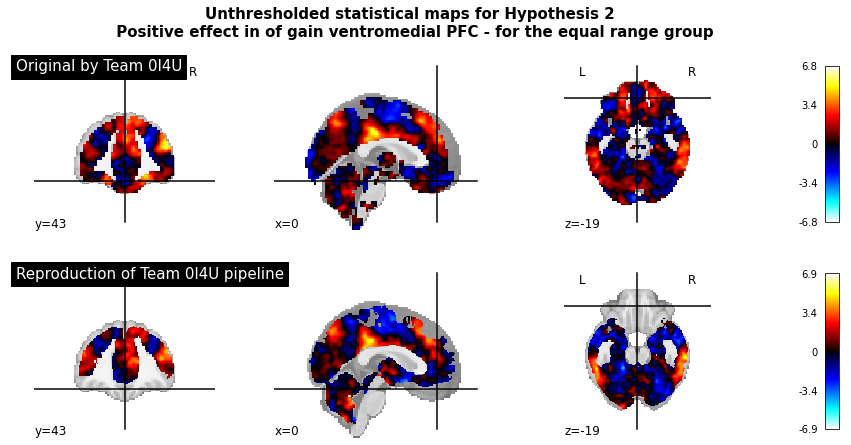

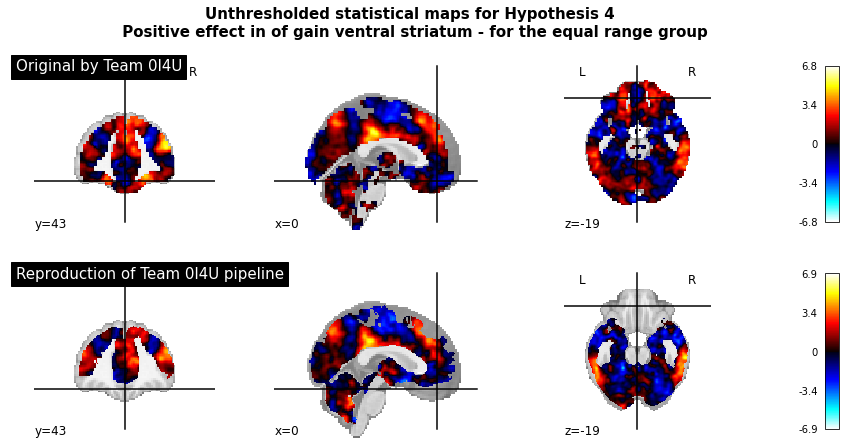

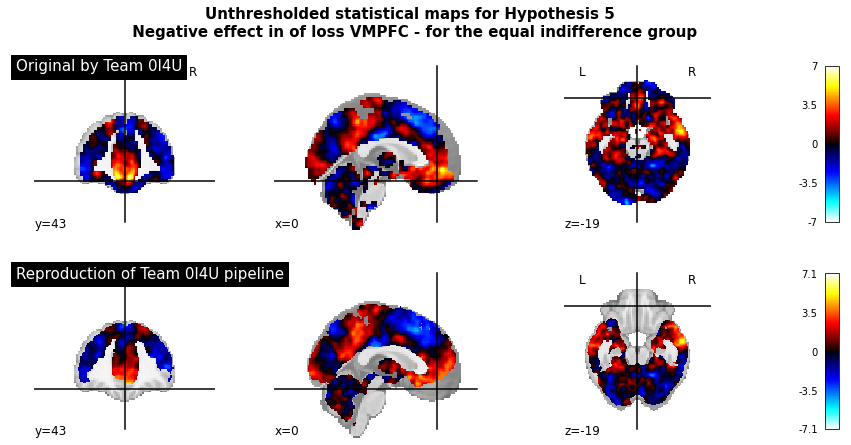

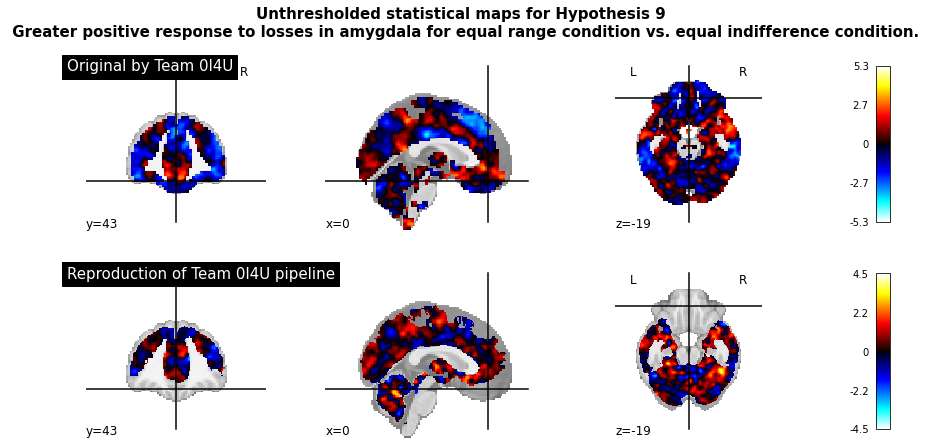

In [10]:
for i in range(len(original_unthresh)):
    f = plt.figure(figsize = (15, 7))
    gs = f.add_gridspec(2, 1)
    ax1 = f.add_subplot(gs[0, 0])
    ax2 = f.add_subplot(gs[1, 0])
    f.suptitle(f"Unthresholded statistical maps for Hypothesis {i+1} \n {hypothesis[i]}",
               fontsize=15, fontweight = 'bold')
    plotting.plot_stat_map(original_unthresh[i], title = f"Original by Team {team_ID}", 
                        figure = f, axes = ax1, cut_coords=vmPFC)
    plotting.plot_stat_map(repro_unthresh[i], title = f"Reproduction of Team {team_ID} pipeline",
                        figure = f, axes = ax2, cut_coords=vmPFC)
    f.savefig(opj(result_dir, f"unthresholded_spm_hypo{i+1}_{team_ID}.png"))

### COMPARISON OF UNTHRESHOLDED MAPS 

### CORRELATIONS 

In [11]:
from lib import correlation
import pandas as pd 

coeff_list = []

print('Pearson\'s product-moment correlation coefficients for unthresh maps')

for i in range(len(repro_unthresh)):
    coeff_list.append(correlation.get_corr_coeff(original_unthresh[i], repro_unthresh[i], 'pearson'))
    print(hypothesis[i], ':', coeff_list[i])
    
coeff_df = pd.Series(coeff_list)
coeff_df.to_csv(opj(result_dir, 'corr_coeff.csv'))

Pearson's product-moment correlation coefficients for unthresh maps
Positive effect of gain in ventromedial PFC - for the equal indifference group : 0.859470053566474
Positive effect in of gain ventromedial PFC - for the equal range group : 0.8184327789763601
Positive effect in of gain ventral striatum - for the equal indifference group : 0.859470053566474
Positive effect in of gain ventral striatum - for the equal range group : 0.8184327789763601
Negative effect in of loss VMPFC - for the equal indifference group : 0.86677654944502
Negative effect in of loss VMPFC - for the equal range group : 0.6697858362965176
Positive effect in of loss amygdala - for the equal indifference group : 0.86677654944502
Positive effect in of loss amygdala - for the equal range group : 0.6697858362965176
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 0.415696145543575


PermissionError: [Errno 13] Permission denied: '/local/egermani/analytic_variability_fmri/figures/quality_measures/0I4U/corr_coeff.csv'

### MEAN SQUARED ERRORS / SUM OF SQUARED ERRORS

In [22]:
from lib import mse

print('Mean Squared Errors for UNTHRESHOLDED maps')
mse_list = []

for i in range(len(original_unthresh)):
    mse_list.append(mse.get_mse(original_unthresh[i], repro_unthresh[i]))
    print(hypothesis[i], ':', mse_list[i])
    
mse_df = pd.Series(mse_list)
mse_df.to_csv(opj(result_dir, 'mse.csv'))

Mean Squared Errors for UNTHRESHOLDED maps
Positive effect of gain in ventromedial PFC - for the equal indifference group : 0.973687134273186
Positive effect in of gain ventromedial PFC - for the equal range group : 1.1497756041598943
Positive effect in of gain ventral striatum - for the equal indifference group : 0.973687134273186
Positive effect in of gain ventral striatum - for the equal range group : 1.1497756041598943
Negative effect in of loss VMPFC - for the equal indifference group : 0.9371585390871291
Negative effect in of loss VMPFC - for the equal range group : 0.7750894839171557
Positive effect in of loss amygdala - for the equal indifference group : 0.9371585390871291
Positive effect in of loss amygdala - for the equal range group : 0.7750894839171557
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 1.8136863811162085


### BLAND ALTMAN PLOT

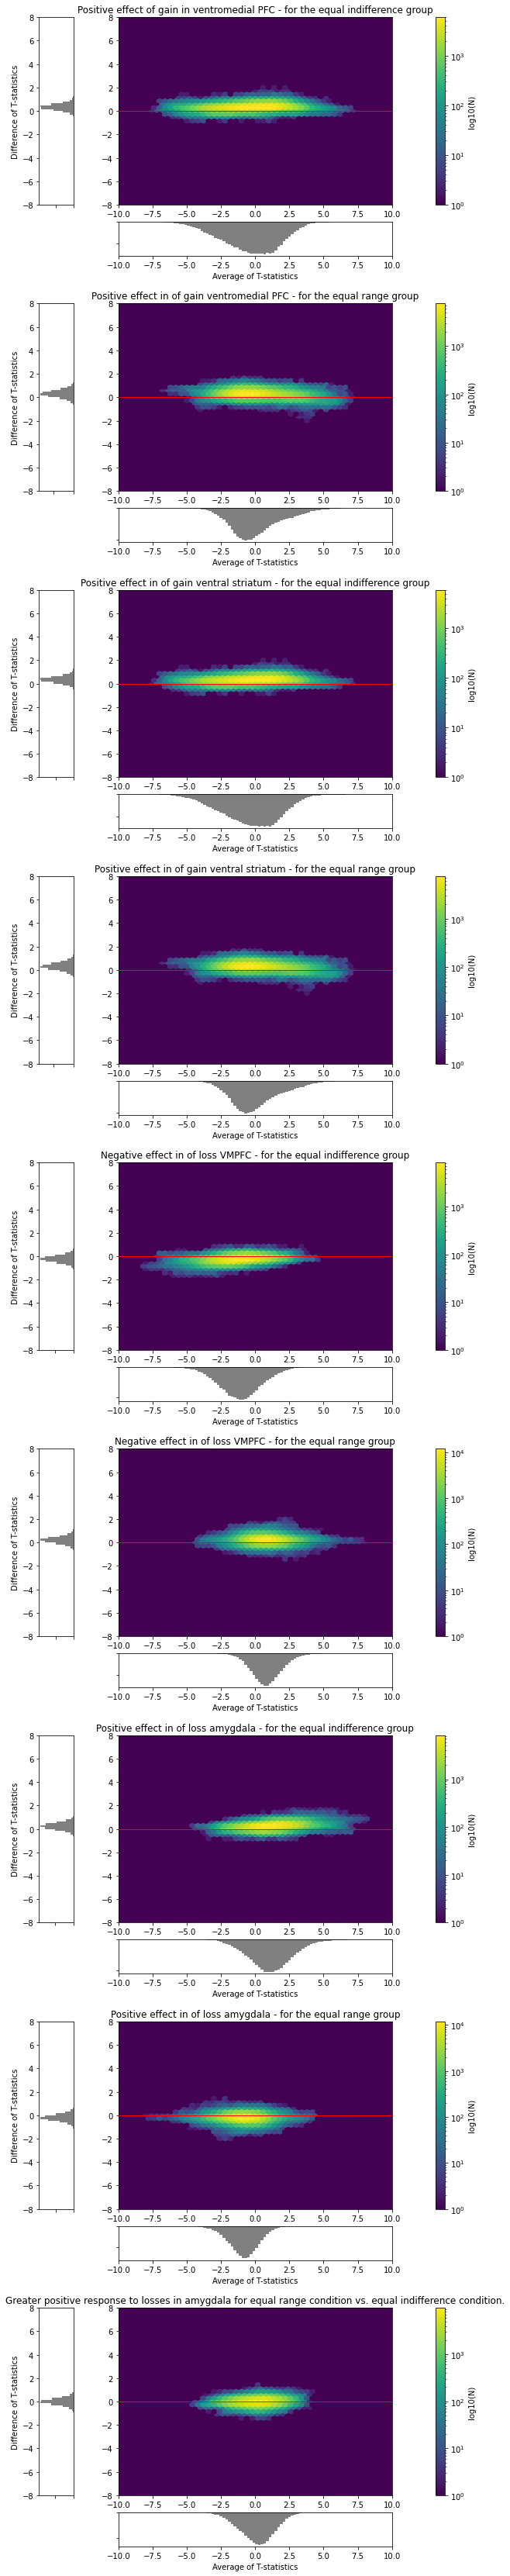

In [14]:
plt.style.use('seaborn-colorblind')

f = plt.figure(figsize=(10, 60))

gs0 = gridspec.GridSpec(len(repro_unthresh), 1, f)

x_label = ' of T-statistics'
y_label = ' of T-statistics'
lims=(-10,10,-8,8)

for i in range(len(repro_unthresh)):
    gs00 = gridspec.GridSpecFromSubplotSpec(
        5, 6, subplot_spec=gs0[i], hspace=0.50, wspace=1.3)

    bland_altman.bland_altman_plot(f, gs00, repro_unthresh[i], original_unthresh[i],
                  hypothesis[i],
                  x_label,
                  y_label,
                  False,
                  lims=lims)

plt.savefig(opj(result_dir, f"bland_altman_{team_ID}.png"))
plt.show()

### EULER CHARACTERISTICS

In [15]:
from lib import euler_chars
import numpy as np

In [16]:
thresholds = np.arange(-6, 6, 0.2)

f = plt.figure(figsize=(7, 20))
gs = gridspec.GridSpec(len(original_unthresh), 1, f, hspace = 0.5)

plt.style.use('default')

for i in range(len(original_unthresh)):
    euler_chars.plot_euler_chars(f, gs, i, original_unthresh[i], repro_unthresh[i], thresholds, hypothesis[i])

plt.savefig(opj(result_dir, f"euler_chars_{team_ID}.png"))
plt.show()

### COMPARISON OF THRESHOLDED MAPS 

### NUMBER OF ACTIVATED VOXELS 

In [23]:
from lib import activated_voxels

print('Number of activated voxels in reproduced THRESHOLDED maps')

for i in range(len(repro_thresh)):
    print(hypothesis[i], ':',
         activated_voxels.get_number_activated_voxels(repro_thresh[i]))

Number of activated voxels in reproduced THRESHOLDED maps
Positive effect of gain in ventromedial PFC - for the equal indifference group : 0
Positive effect in of gain ventromedial PFC - for the equal range group : 207
Positive effect in of gain ventral striatum - for the equal indifference group : 0
Positive effect in of gain ventral striatum - for the equal range group : 207
Negative effect in of loss VMPFC - for the equal indifference group : 188
Negative effect in of loss VMPFC - for the equal range group : 0
Positive effect in of loss amygdala - for the equal indifference group : 48
Positive effect in of loss amygdala - for the equal range group : 0
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 0


In [24]:
print('Number of activated voxels in original THRESHOLDED maps')
for i in range(len(original_thresh)):
    print(hypothesis[i], ':',
         activated_voxels.get_number_activated_voxels(original_thresh[i]))

Number of activated voxels in original THRESHOLDED maps
Positive effect of gain in ventromedial PFC - for the equal indifference group : 11
Positive effect in of gain ventromedial PFC - for the equal range group : 259
Positive effect in of gain ventral striatum - for the equal indifference group : 11
Positive effect in of gain ventral striatum - for the equal range group : 259
Negative effect in of loss VMPFC - for the equal indifference group : 335
Negative effect in of loss VMPFC - for the equal range group : 0
Positive effect in of loss amygdala - for the equal indifference group : 99
Positive effect in of loss amygdala - for the equal range group : 0
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 0


### OVERLAP AND NON-OVERLAP BETWEEN THRESHOLDED MAPS

In [11]:
print('Overlap between reproduced thresholded maps and original ones')

for i in range(len(original_thresh)):
    print(hypothesis[i], ':', 
          activated_voxels.get_overlap_bw_voxels(original_thresh[i], repro_thresh[i], 
                                                 opj(result_dir, f"overlap_hypo{i+1}.nii"), 
                                                 opj(result_dir, f"non_overlap_hypo{i+1}.nii"))[0])

Overlap between reproduced thresholded maps and original ones


ValueError: operands could not be broadcast together with shapes (121,145,121) (79,95,65) 

In [36]:
print('Non-overlap between reproduced thresholded maps and original ones')

for i in range(len(original_thresh)):
    print(hypothesis[i], ':', 
          activated_voxels.get_overlap_bw_voxels(original_thresh[i], repro_thresh[i], 
                                                 opj(result_dir, f"overlap_hypo{i+1}.nii"), 
                                                 opj(result_dir, f"non_overlap_hypo{i+1}.nii"))[1])

Non-overlap between reproduced thresholded maps and original ones
Positive effect of gain in ventromedial PFC - for the equal indifference group : 2779
Positive effect in of gain ventromedial PFC - for the equal range group : 3025
Positive effect in of gain ventral striatum - for the equal indifference group : 2779
Positive effect in of gain ventral striatum - for the equal range group : 3025
Negative effect in of loss VMPFC - for the equal indifference group : 42
Negative effect in of loss VMPFC - for the equal range group : 1923
Positive effect in of loss amygdala - for the equal indifference group : 7654
Positive effect in of loss amygdala - for the equal range group : 100
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 441


In [9]:
from lib import dice

print('DICE coefficient between reproduced thresholded maps and original ones')

for i in range(len(original_thresh)):
    print(hypothesis[i], ':', dice.get_dice(original_thresh[i], repro_thresh[i]))

DICE coefficient between reproduced thresholded maps and original ones
Positive effect of gain in ventromedial PFC - for the equal indifference group : 3.0917596257646633
Positive effect in of gain ventromedial PFC - for the equal range group : 6.952066115702479
Positive effect in of gain ventral striatum - for the equal indifference group : 3.0917596257646633
Positive effect in of gain ventral striatum - for the equal range group : 6.952066115702479
Negative effect in of loss VMPFC - for the equal indifference group : 6.714285714285714
Negative effect in of loss VMPFC - for the equal range group : 4.34009360374415
Positive effect in of loss amygdala - for the equal indifference group : 3.3859419911157564
Positive effect in of loss amygdala - for the equal range group : 4.32
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 1.5011337868480725
